In [1]:
import requests
import json
import sqlite3
from bs4 import BeautifulSoup
import sqlite3
import nltk
import gensim
import requests

# Вниз иди

In [2]:
filtered_db = 'data_set.db'

conn = sqlite3.connect(filtered_db)
cursor = conn.cursor()

cursor.execute('SELECT * from vacancies')
filtered = cursor.fetchall()
conn.close()

In [3]:
filtered[0]

('29654783',
 'Инженер удаленной технической поддержки рабочих мест',
 'Самара',
 'Сбербанк',
 '2019-04-26T14:37:49+0300',
 '<p><strong>Обязанности:</strong></p> <p>• Обработка/решение поступающих заявок, консультирование сотрудников банка по вопросам технической поддержки автоматизированных рабочих мест пользователей (ПК/Оргтехника/Мобильные устройства).</p> <p>• Удаленное решение заявок по установке/настройке ПО средствами SCCM и с использованием средств удаленного администрирования (RDP).</p> <p>• Удаленное взаимодействие с сервисными компаниями по вопросам оказания услуги тех.поддержки.</p> <p><strong>Требования:</strong></p> <p>• Законченное высшее образование по направлению Информационные технологии.</p> <p>• Желателен опыт работы в сфере ИТ (сопровождение рабочих мест, инфраструктуры, серверов, корпоративной телефонии).</p> <p>• Экспертное знание MS Windows 7/10, MS Office 2010/2016.</p> <p>Опыт работы/администрирования MacOS/iOS, Linux.</p> <p>• Опыт поддержки ПК, системного ПО

In [4]:
main_list = []
for i in filtered:
    if "strong" in i[5]:
        texttest = i[5]
        teststrong = texttest.split('<strong>')
        cur_list = [j.split('</strong>') for j in teststrong if '</strong>' in j] 
        main_list.append(cur_list)

In [5]:
len(main_list)

1164

In [6]:
keywords = ['требования', 'требуется', 'если', 'ждем', 'ждём', 
            'ожидаем', 'ищем', 'будет', 'компетенции', 'плюсом', 'желательно'
           'знание', 'стек', 'стэк', 'технологии', 'навыки', 'обязательно', 
            'от вас', 'опыт', 'ожидания', 'плюсами']

In [7]:
requir = []
counter = {}
for i in range(1164):
    counter[i] = 0
    for j in main_list[i]:
        for k in keywords:
            if k in j[0].lower():
                requir.append(j[1])
                counter[i] += 1
len(requir)

1619

In [8]:
len([x for x in counter if counter[x] == 0])

191

In [9]:
main_list[1]

[['Требования: ',
  '</p><p>Опыт web разработки от 3 лет (HTML, HTML5, CSS, JavaScript, препроцессинг CSS)<br />Опыт разработки на библиотеках и фреймворках (AngularJS, ReactJS)<br />Активное использование инструментов контроля версий (Git, CVS)<br />Умение работать с базами данных и языками запросов (SQL)<br />Опыт работы с серверными технологиями (Node.js)<br />Взаимодействие с бекендом (SOAP/REST)</p><div><p></p><p><b>Условия работы:</b></p><p>'],
 ['Мы предлагаем:',
  '</p><p> </p><ul><li>трудоустройство согласно ТК РФ;</li><li>гарантированный доход плюс премиальное вознаграждение;</li><li>возможность работать рядом с домом/местом учебы;</li><li>регулярное корпоративное обучение;</li><li>ДМС, страхование от несчастных случаев и тяжелых заболеваний;</li><li>материальную помощь и социальную поддержку, корпоративную пенсионную программу;</li><li>льготные условия кредитования;</li><li>яркую и насыщенную корпоративную жизнь.<br /></li></ul><p>'],
 ['Мы ждем тебя, чтобы строить счастливо

In [10]:
requir[7]

'</u></p><p> </p><p>Желательно, фул-стек (JAVA + UI). Если нет UI, то было бы хорошо, если есть желание развиваться в эту сторону.</p><p> </p><p>Для Java:<br />Опыт работы с технологиями: Spring, Hibernate, Gradle, JMS, JAX-WS, Git, Jenkins, UML, Junit.</p><p> </p><p>Для UI:<br />Знание JavaScript (es6/es7: классы, импорты декораторы, arrow-функции, генераторы, промисы)<br />Экспертное знание HTML, HTML5, SASS/LESS/CSS<br />• Опыт работы с js-фреймоврками (например, Backbone, Angular, React, Reflux).<br />• Опыт работы с Webpack: уметь собрать проект с картинками и стилями, скриптами.<br />• Опыт работы с REST-сервисами<br />• Понятие о принципах разработки ПО, ООП, паттернах проектирования<br />• Умение работать с Git Будет плюсом<br />• Знание React Опыт работы с Bootstrap, Ionic, Foundation и т.д.<br />• Умение разрабатывать прототипы UI с помощью, например, Axure, Pixate, Invision, Proto.io и т.д.</p><p> </p><p><u>'

In [11]:
work_list = []
for i in requir:
    work_list.append(i.split('>'))

In [12]:
new_work_list = []
for i in work_list:
    ap_list = []
    for j in i:
        ap_list.append(j.split('<'))
    new_work_list.append(ap_list)

In [13]:
flatten_list = []
for i in new_work_list:
    for j in i:
        for k in j:
            flatten_list.append(k)

In [14]:
tag_list = ['ulx', 'li', 'p', 'b', '/ul', '/li', '/p', '/b', 'em','/em','div','/div','br','/br','br/', 'ol', '/ol', '/span', 'u', '/u']

In [15]:
new_flatten_list = []
for i in flatten_list:
    if i not in tag_list and i != "" and i != " ":
        new_flatten_list.append(i)

In [16]:
full_text = ""
for i in new_flatten_list:
    full_text = full_text + " " + i

In [17]:
trash = ["опыт", "образование", 'знание', 'умение','навык','работа','разработка','понимание','система','год','принцип','тестирование','span','приложение','использование','язык','технология','проект','область','span_span','продукт','написание','решение','плюс','уровень','процесс','код','команда','владение','проектирование','задача','база','архитектура','автоматизация','анализ','основа','инструмент','управление','требование','','','','']

In [18]:
trash_type = ['ADJF','PRTF','INTJ','PREP','GRND','INFN','ADVB']

In [19]:
from gensim.utils import simple_preprocess
import string
from nltk.corpus import stopwords
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

def remove_stopwords(words):
    return [morph.parse(word)[0].normal_form for word in words if word not in stopwords.words('russian')]

def prepare_text(text):
    return [remove_stopwords(gensim.utils.simple_preprocess(str(sentence), deacc=True)) \
               for sentence in text]

In [20]:
sample_text = nltk.sent_tokenize(full_text)
sample_text = prepare_text(sample_text)

# РАЗДЕЛЕНИЕ(То есть не надо)

In [21]:
dict_shifr = {"ms": "microsoft_office", "js": "javascript"}

In [22]:
new_sample_text = []
for i in sample_text:
    sample_list = []
    for j in i:
        if j not in trash and morph.parse(j)[0].tag.POS not in trash_type:
            word = j
            if word in dict_shifr.keys():
                word = dict_shifr[word]
            sample_list.append(word)
    new_sample_text.append(sample_list)

In [23]:
bigram = gensim.models.phrases.Phrases(new_sample_text, min_count=3, threshold=10)
sample_text_bigram = [bigram[sent] for sent in new_sample_text]

In [24]:
final_list = []
for i in sample_text_bigram:
    for j in i:
        final_list.append(j)

In [25]:
final_list

['направление',
 'сфера_ит',
 'сопровождение',
 'рабочий_место',
 'инфраструктура',
 'сервер',
 'телефония',
 'microsoft_office',
 'windows',
 'microsoft_office_office',
 'macos_ios',
 'linux',
 'поддержка',
 'пк',
 'пк',
 'windows',
 'устроиство',
 'пк',
 'ответственность',
 'web',
 'html',
 'html_css',
 'javascript',
 'препроцессинг',
 'css',
 'br',
 'библиотека',
 'фреимворка',
 'angularjs',
 'reactjs',
 'br',
 'контроль_версия',
 'git',
 'cvs',
 'br',
 'запрос',
 'sql',
 'br',
 'node_javascript',
 'br',
 'взаимодеиствие',
 'бекендом',
 'soap_rest',
 'условие',
 'web',
 'html',
 'html_css',
 'javascript',
 'препроцессинг',
 'css',
 'br',
 'библиотека',
 'фреимворка',
 'angularjs',
 'reactjs',
 'br',
 'контроль_версия',
 'git',
 'cvs',
 'br',
 'запрос',
 'sql',
 'br',
 'node_javascript',
 'br',
 'взаимодеиствие',
 'бекендом',
 'soap_rest',
 'условие',
 'ul',
 'ит',
 'itsm',
 'itil',
 'поддержка',
 'ас',
 'линия',
 'сопровождение',
 'jira_confluence',
 'построение',
 'отчёт',
 'grafan

In [26]:
freq_list = nltk.FreqDist(final_list)
freq_list.most_common(7)

[('ul', 1701),
 ('br', 487),
 ('sql', 207),
 ('python', 204),
 ('java', 173),
 ('javascript', 167),
 ('git', 163)]

In [27]:
len(freq_list)

3431

# РАЗДЕЛЕНИЕ(ниже надо!)

In [27]:
list_requir = ['office', 'windows', 'macos', 'linux', 'web', 'html', 'javascript', 'java', 'css', 'angularjs', 'reactjs', 'git', 'cvs', 'sql', 'node', 'soap', 'rest', 'agile', 'navision', 'c#', 'c++', 'assembler', 'windbg', 'TFS']

In [28]:
len(list_requir)

24

In [29]:
list_vect = []
for i in filtered:
    vect = []
    for j in list_requir:
        if j in i[5].lower():
            vect.append(1)
        else:
            vect.append(0)
    list_vect.append(vect)

In [30]:
len(list_vect)

1215

In [31]:
list_vect[0]

[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [32]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import numpy as np

ImportError: cannot import name 'fetch_openml' from 'sklearn.datasets' (C:\Users\busya\Anaconda3\lib\site-packages\sklearn\datasets\__init__.py)

In [128]:
y = [i[1] for i in filtered]
X = list_vect

In [129]:
X = np.array(X, float)
y = np.array(y, str)

In [130]:
some_digit = X[600]

In [131]:
some_digit_image = some_digit.reshape(6, 4)

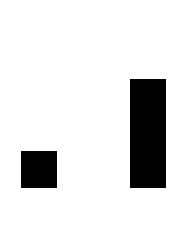

In [132]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [133]:
y[600]

'Software Development Engineer in test C#'

In [134]:
X_train, X_test, y_train, y_test = X[:100], X[900:1000], y[:100], y[900:1000]

In [135]:
shuffle_index = np.random.permutation(100)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [136]:
from sklearn import svm

In [137]:
clf = svm.SVC(gamma='scale')

In [138]:
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

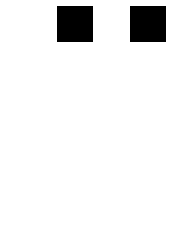

In [139]:
some_digit2 = X_test[1]
some_digit_image2 = some_digit2.reshape(6, 4)
plt.imshow(some_digit_image2, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [140]:
clf.predict([some_digit2])

array(['Главный инженер по разработке'], dtype='<U98')

In [141]:
for i in range(20):
    print(clf.predict([X[i]]))

['Инженер удаленной технической поддержки рабочих мест']
['JavaScript разработчик']
['JavaScript разработчик']
['Системный аналитик']
['Главный инженер по разработке']
['Full stack developer']
['Главный инженер по разработке']
['Системный аналитик']
['Главный инженер по разработке']
['Главный инженер по разработке']
['Главный инженер по Java разработке']
['Системный аналитик']
['Системный аналитик']
['Главный инженер по разработке']
['Главный инженер по разработке']
['Главный инженер по разработке']
['Главный инженер по разработке']
['Системный аналитик']
['Разработчик Navision']
['Full stack developer']


In [142]:
for i in range(20):
    print(filtered[i][1])

Инженер удаленной технической поддержки рабочих мест
Frontend разработчик
JavaScript разработчик
Ведущий инженер
Главный инженер по сопровождению
Full stack developer
Аналитик HCM (PA, OM)
Дизайнер UX|UI
Разработчик Big Data
Системный администратор Oracle
Главный инженер по Java разработке
Системный аналитик
ABAP разработчик
Владелец продукта 'Боты в голосе и тексте'
Руководитель разработки_java
Product Owner of Autotesting
Главный инженер по разработке
Product\xa0Owner/ Co-browsing
Разработчик Navision
Frontend-разработчик


In [87]:
some_digit2

array([0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [102]:
from sklearn.decomposition import PCA

In [103]:
reduced_data = PCA(n_components=2).fit_transform(X_test)

In [104]:
clusters_in_new_dimension = kmeans.fit(reduced_data)

In [105]:
clusters_in_new_dimension.labels_

array([7, 4, 4, 4, 4, 4, 2, 0, 6, 0, 4, 4, 8, 4, 9, 0, 4, 4, 5, 3, 4, 4,
       4, 8, 8, 4, 2, 5, 8, 4, 4, 4, 5, 6, 4, 4, 3, 4, 7, 5, 3, 4, 4, 2,
       0, 2, 3, 4, 0, 0, 4, 4, 9, 4, 7, 4, 3, 7, 4, 4, 4, 4, 4, 1, 5, 0,
       5, 9, 4, 0, 4, 0, 5, 8, 0, 7, 6, 9, 5, 4, 1, 5, 8, 6, 1, 3, 7, 3,
       4, 7, 7, 2, 4, 8, 5, 4, 0, 4, 4, 7])

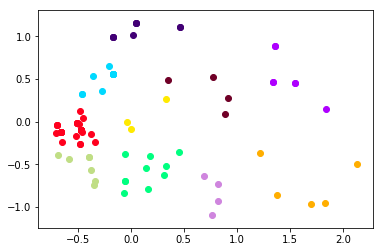

In [106]:
x0, x1, x2, x3, x4, x5, x6, x7, x8, x9 = [], [], [], [], [], [], [], [], [], []
y0, y1, y2, y3, y4, y5, y6, y7, y8, y9 = [], [], [], [], [], [], [], [], [], []

for i in range(len(clusters_in_new_dimension.labels_)):
    if clusters_in_new_dimension.labels_[i] == 0:
        x0.append(reduced_data[i, 0])
        y0.append(reduced_data[i, 1])
    elif clusters_in_new_dimension.labels_[i] == 1:
        x1.append(reduced_data[i, 0])
        y1.append(reduced_data[i, 1])
    elif clusters_in_new_dimension.labels_[i] == 2:
        x2.append(reduced_data[i, 0])
        y2.append(reduced_data[i, 1])
    elif clusters_in_new_dimension.labels_[i] == 3:
        x3.append(reduced_data[i, 0])
        y3.append(reduced_data[i, 1])
    elif clusters_in_new_dimension.labels_[i] == 4:
        x4.append(reduced_data[i, 0])
        y4.append(reduced_data[i, 1])
    elif clusters_in_new_dimension.labels_[i] == 5:
        x5.append(reduced_data[i, 0])
        y5.append(reduced_data[i, 1])
    elif clusters_in_new_dimension.labels_[i] == 6:
        x6.append(reduced_data[i, 0])
        y6.append(reduced_data[i, 1])
    elif clusters_in_new_dimension.labels_[i] == 7:
        x7.append(reduced_data[i, 0])
        y7.append(reduced_data[i, 1])
    elif clusters_in_new_dimension.labels_[i] == 8:
        x8.append(reduced_data[i, 0])
        y8.append(reduced_data[i, 1])
    elif clusters_in_new_dimension.labels_[i] == 9:
        x9.append(reduced_data[i, 0])
        y9.append(reduced_data[i, 1])


for i, j, k in [(x0, y0, '#00d9ff'), (x1, y1, '#ffea00'), (x2, y2, '#ffae00'), (x3, y3, '#ae00ff'), (x4, y4, '#ff001e'),
          (x5, y5, '#00ff80'), (x6, y6, '#700027'), (x7, y7, '#420075'), (x8, y8, '#c0de85'), (x9, y9, '#cf85de')]:
    plt.scatter(i, j, color=k)
plt.show()

# Находим встречаемость

### Неактуально, лучше залезть в визуализацию

In [34]:
task_list = ['sql','python','java','git','javascript','windows','linux']

In [35]:
id_ = filtered[0][0]

In [36]:
filtered[0]

('29654783',
 '<div class="g-user-content" data-qa="vacancy-description" itemprop="description"><p><strong>Обязанности:</strong></p> <p>• Обработка/решение поступающих заявок, консультирование сотрудников банка по вопросам технической поддержки автоматизированных рабочих мест пользователей (ПК/Оргтехника/Мобильные устройства).</p> <p>• Удаленное решение заявок по установке/настройке ПО средствами SCCM и с использованием средств удаленного администрирования (RDP).</p> <p>• Взаимодействие с сервисными компаниями по вопросам оказания услуги тех.поддержки.</p> <p><strong>Требования:</strong></p> <p>• Законченное высшее образование по направлению Информационные технологии, возможно последний курс.</p> <p>• Желателен опыт работы в сфере ИТ.</p> <p>• Экспертное знание MS Windows 7 и MS Office 2010 и выше.</p> <p>• Опыт поддержки ПК, системного ПО, в т.ч. навыки удаленного администрирования ПК.</p> <p>• Знание технического устройства ПК и его аппаратных составляющих.</p> <p>• Стрессоустойчивос

In [37]:
requests.get('https://api.hh.ru/vacancies/' + i[0]).json()['published_at'][5:7]

KeyError: 'published_at'

In [42]:
list_id

[['04',
  '01',
  '01',
  '01',
  '01',
  '01',
  '03',
  '02',
  '02',
  '02',
  '03',
  '03',
  '03',
  '04',
  '04',
  '04',
  '01',
  '02',
  '03',
  '08',
  '12',
  '02',
  '01',
  '01',
  '02',
  '04',
  '02',
  '05',
  '09',
  '04',
  '07',
  '04',
  '04',
  '05',
  '04',
  '04',
  '04',
  '11',
  '05',
  '11',
  '11',
  '11',
  '07',
  '07',
  '06',
  '07',
  '09',
  '08',
  '11',
  '09',
  '11',
  '08',
  '11',
  '09',
  '10',
  '11',
  '11',
  '10',
  '11',
  '03',
  '08',
  '11',
  '04',
  '01',
  '04',
  '02',
  '01',
  '01',
  '02',
  '02',
  '05',
  '01',
  '01',
  '01',
  '01',
  '02',
  '01',
  '01',
  '01',
  '05',
  '06',
  '01',
  '01',
  '03',
  '01',
  '01',
  '01',
  '01',
  '04',
  '02',
  '02',
  '02',
  '05',
  '02',
  '03',
  '03',
  '03',
  '02',
  '02',
  '02',
  '06',
  '02',
  '02',
  '12',
  '04',
  '03',
  '03',
  '04',
  '03',
  '03',
  '03',
  '09',
  '03',
  '08',
  '03',
  '03',
  '05',
  '03',
  '11',
  '04',
  '04',
  '04',
  '04',
  '04',
  '04',


In [147]:
len('[office, windows, macos, linux, web, html, javascript, java, css, angularjs, reactjs, git, cvs, sql, node, soap, rest, agile, navision, c#, c++, assembler, windbg, TFS, Preforcescala, perl, awk, bash, orm, вебфреймворки, soap, ml, dm, sas baseguideminer, pydata, pandas, numpy, skipy, scikitlearn, kerastensoflow,  django, python, shell, teradata, perl, ruby, субд, oracle, mssql, gcc, llvm, itil, cobit, btc, mvc, mvvm, ioc, di, dagger, android, object, ivec, cpu, logreg, svm, decision trees, gradientboosting, svd, pca, cnn, lstm,ооп, solid, ioc, gof, jquery, learning, ibm, hp, vmware, citrix, nginx, xml, nix, git, hlha, iis, boost, selenium, ansible]'.split(","))

90